In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
data = load_breast_cancer(as_frame=True)
X,y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9239766081871345
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



<Axes: >

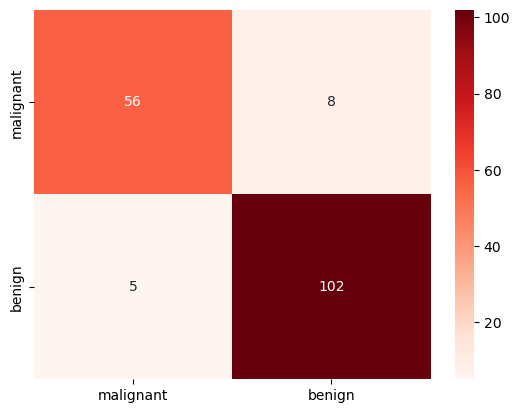

In [10]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Reds', fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)

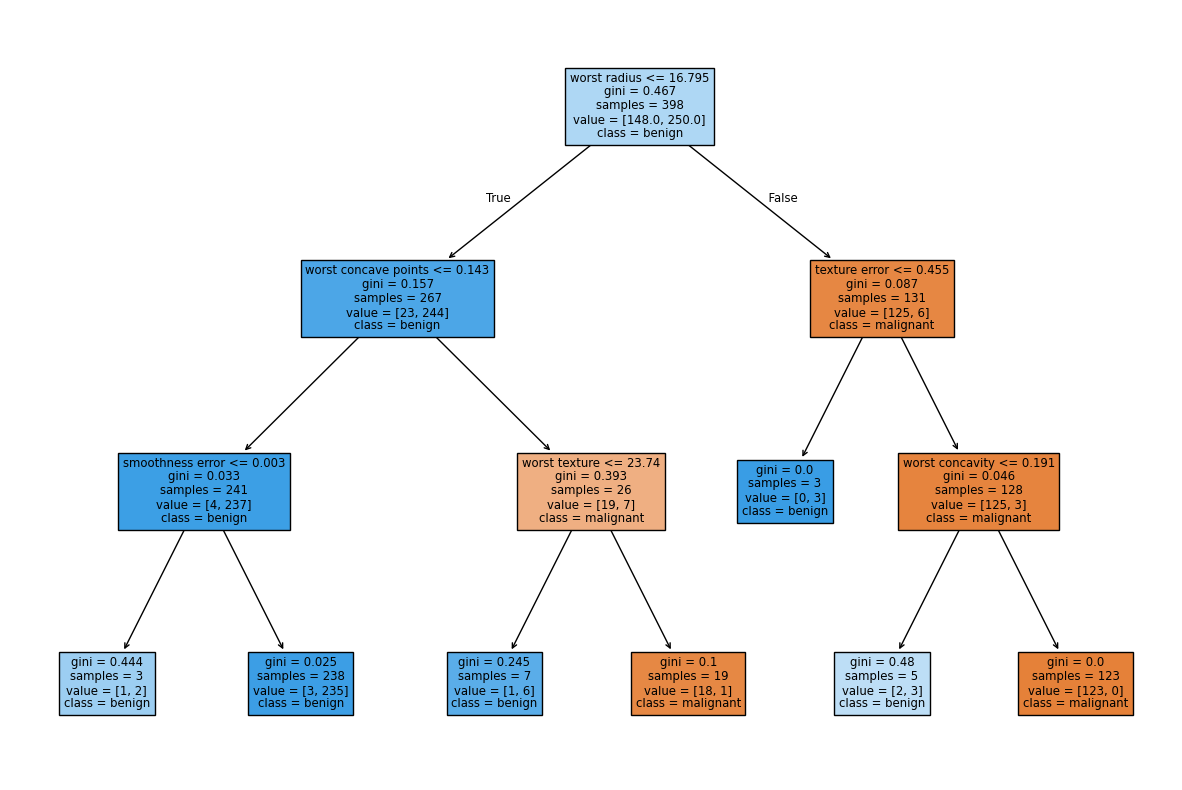

In [12]:
plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True)
plt.show()

In [15]:
new_samples = X_test.iloc[[10]]
prediction  = data.target_names[model.predict(new_samples)]

print(f"Features: {new_samples.values[0][:4]} ...truncated")
print(f"Predicted class: {prediction}")

Features: [ 11.14  14.07  71.24 384.6 ] ...truncated
Predicted class: ['benign']
